In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #数据可视化
sns.set_style('whitegrid')

In [2]:
import os

In [3]:
folder = 'TTNKdata'
_train_path=os.path.join(folder,'train.csv')
_test_path=os.path.join(folder,'test.csv')

In [4]:
train_data=pd.read_csv(_train_path)
test_data=pd.read_csv(_test_path)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
type(train_data.Age[5])
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_data.info()
print('-'*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

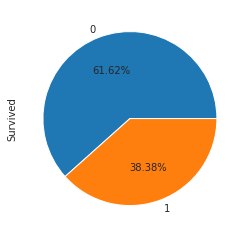

In [7]:
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')
#train_data['Survived'].value_counts() 计算0,1 个数
#pie(autopct = '%1.2f%%') 绘图及显示百分比

In [8]:
# 中间有部分信息丢失
# 一些机器学习算法能够处理缺失值，比如神经网络，一些则不能。对于缺失值，一般有以下几种处理方法：

# （1）如果数据集很多，但有很少的缺失值，可以删掉带缺失值的行；

# （2）如果该属性相对学习来说不是很重要，可以对缺失值赋均值或者众数。
# （3）对于标称属性，可以赋一个代表缺失的值，比如‘U0’。因为缺失本身也可能代表着一些隐含信息。比如船舱号Cabin这一属性，缺失可能代表并没有船舱。
# （4）使用回归 随机森林等模型来预测缺失属性的值。

In [9]:
train_data.Embarked[train_data.Embarked.isnull()]#isnull()显示缺失项

61     NaN
829    NaN
Name: Embarked, dtype: object

In [10]:
train_data.Embarked.dropna().mode().values#如果为多值另做处理

array(['S'], dtype=object)

In [11]:
df = pd.DataFrame({'A': [1, 2, 1, 2, 1, 2, 3]})
df.mode().values#众数

array([[1],
       [2]])

In [12]:
mode=train_data.Embarked.dropna().mode().values[0]
train_data.Embarked=train_data.Embarked.fillna(mode)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [14]:
# 将没有船舱作为一种属性
train_data['Cabin'] 
train_data.Cabin = train_data.Cabin.fillna('U0')#对空值填充

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
#预测age
#本来应该使用决策树，随机森利之类的进行预测的

In [17]:
#简单使用不同性别的均值
x,y = train_data.Age.dropna().values,train_data.Sex[train_data.Age.notnull()].values

In [18]:
y = np.where(y == 'male',1,0)#三目替换

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

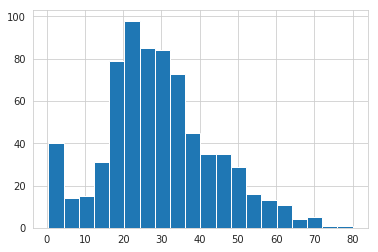

In [19]:
#总体的年龄分布.
plt.hist(x,bins=20)
#plt.hist(titanic.Age, # 绘图数据bins = 20, # 指定直方图的条形数为20个color = 'steelblue', # 指定填充色edgecolor = 'k', # 指定直方图的边界色label = '直方图') # 为直方图呈现标签

In [20]:
local=train_data.Sex[train_data.Sex=='male']

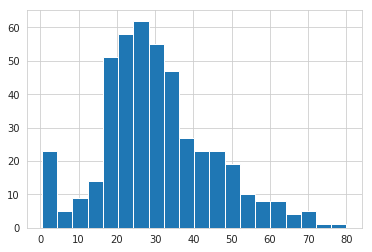

In [21]:
male_age = train_data.Age[train_data.Sex=='male'].dropna().values
local=plt.hist(male_age,bins=20)

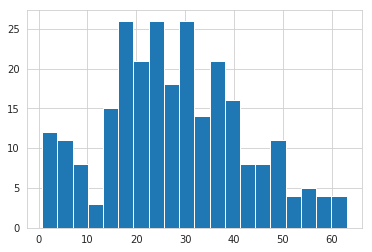

In [22]:
female_age = train_data.Age[train_data.Sex=='female'].dropna().values
local=plt.hist(female_age,bins=20)

In [23]:
male_miss_age_num = len(train_data.Age[train_data.Age.isnull()][train_data.Sex=='male'])
male_age.mean(),male_age.var() 

(30.72664459161148, 214.9739732886959)

In [24]:
fillage = np.random.normal(male_age.mean(),male_age.std(),male_miss_age_num)
index = train_data.Age[train_data.Age.isnull()][train_data.Sex=='male'].index
miss_dic = dict(zip(index,fillage))
#print(miss_dic)

In [25]:
train_data.Age.fillna(miss_dic,inplace=True)#男性年龄补全

In [26]:
female_miss_age_num = len(train_data.Age[train_data.Age.isnull()][train_data.Sex=='female'])
fillage2 = np.random.normal(female_age.mean(),female_age.std(),female_miss_age_num)
index = train_data.Age[train_data.Age.isnull()][train_data.Sex=='female'].index
miss_dic2 = dict(zip(index,fillage2))
train_data.Age.fillna(miss_dic2,inplace=True)#女性年龄补全

In [27]:
# male_age.mean(),male_age.var() 
# male_age.std()
# np.sqrt(male_age.var())##获取方差的两种方式

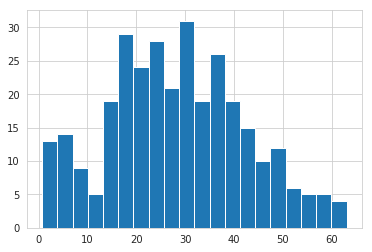

In [28]:
female_age = train_data.Age[train_data.Sex=='female'].dropna().values
local=plt.hist(female_age,bins=20)#补全之后的女性年龄统计

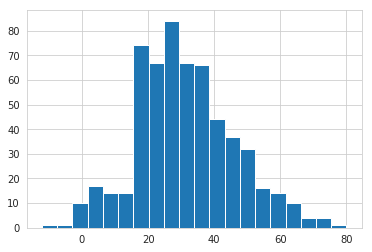

In [29]:
male_age = train_data.Age[train_data.Sex=='male'].dropna().values
local=plt.hist(male_age,bins=20)#男性补全

In [30]:
train_data.info()#补完数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [31]:
train_data.Sex.replace({'male':1,'female':0},inplace = True)#数值化

In [32]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U0,S


In [33]:
#分析数据关系
#1. 性别与生存的关系
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: Survived, dtype: int64

In [35]:
#对于没有序数关系的属性，可以使用onehot编码，防止引入序关系

In [42]:
train_data.Cabin[27]

'C23 C25 C27'